In [44]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

In [45]:
df = pd.read_csv('ChurnData.csv')

In [46]:
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [47]:
df['churn'].value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [48]:
#df.info()

In [49]:
# all relevant customer data and develop focused customer retention programs.

In [50]:
# Data pre-processing and selection
# Lets select some features for the modeling

df = df[['tenure', 'age', 'address', 'income', 'ed',
         'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
churn       200 non-null int32
dtypes: float64(9), int32(1)
memory usage: 14.9 KB


In [52]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [53]:
y = np.asarray(df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [54]:
# Normalize the dataset

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [55]:
# Train / Test split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Train set:', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_train.shape)

Train set: (160, 7) (160,)
Test set (40, 7) (160,)


In [56]:
# Logistic Regression and can use different numerical optimizers 
# to find parameters, including 
# ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers

In [57]:
# modeling Logistic Regression with scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# predict the test set
# yhat is basically y_pred

yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [59]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5 , 0.5 ],
       [0.51, 0.49],
       [0.47, 0.53],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.73, 0.27],
       [0.5 , 0.5 ],
       [0.67, 0.33],
       [0.46, 0.54],
       [0.57, 0.43],
       [0.73, 0.27],
       [0.57, 0.43],
       [0.76, 0.24],
       [0.65, 0.35],
       [0.48, 0.52],
       [0.51, 0.49],
       [0.82, 0.18],
       [0.52, 0.48],
       [0.54, 0.46],
       [0.69, 0.31],
       [0.57, 0.43],
       [0.7 , 0.3 ],
       [0.47, 0.53],
       [0.69, 0.31],
       [0.42, 0.58],
       [0.66, 0.34],
       [0.5 , 0.5 ],
       [0.43, 0.57],
       [0.47, 0.53],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.44, 0.56],
       [0.65, 0.35],
       [0.57, 0.43],
       [0.56, 0.44],
       [0.5 , 0.5 ],
       [0.48, 0.52]])

In [60]:
# Jaccard index for accuracy evaluation

from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, yhat)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.775

In [68]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7853510895883776

In [61]:
# another way of looking at accuracy of classifier is to look 
# at confusion matrix

# from sklearn.metrics import classification_report, confusion_matrix
# import itertools
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
# print(confusion_matrix(y_test, yhat, labels=[1,0])) 

Confusion matrix, without normalization
[[ 6  3]
 [ 6 25]]


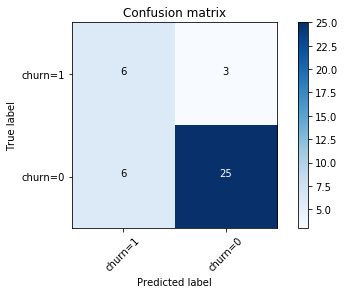

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = 
  ['churn=1','churn=0'], normalize = False,  title = 'Confusion matrix') 

In [63]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.50      0.67      0.57         9

    accuracy                           0.78        40
   macro avg       0.70      0.74      0.71        40
weighted avg       0.80      0.78      0.79        40



In [64]:
# Log loss measures the performance of a classifier 

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5562764596237846

In [65]:
# Solver = 'sag'

In [66]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))


LogLoss: : 0.46
